In [3]:
# -*- coding: utf-8 -*-
"""
 
Contains 2-dimensional filters for the spatial filtering of images. Some of
the code below is taken from psychopy [Peirce JW (2009) Generating stimuli
for neuroscience using PsychoPy. Front. Neuroinform. 2:10.
doi:10.3389/neuro.11.010.2008]. I had trouble installing this on my macs, so
I just pilfered the appropriate functions (sorry!).
 
"""
 
import numpy as np
from skimage import exposure
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import misc
 
def butter2d_lp(shape, f, n, pxd=1):
    """Designs an n-th order lowpass 2D Butterworth filter with cutoff
   frequency f. pxd defines the number of pixels per unit of frequency (e.g.,
   degrees of visual angle)."""
    pxd = float(pxd)
    rows, cols = shape
    x = np.linspace(-0.5, 0.5, cols)  * cols / pxd
    y = np.linspace(-0.5, 0.5, rows)  * rows / pxd
    radius = np.sqrt((x**2)[np.newaxis] + (y**2)[:, np.newaxis])
    filt = 1 / (1.0 + (radius / f)**(2*n))
    return filt
 
def butter2d_bp(shape, cutin, cutoff, n, pxd=1):
    """Designs an n-th order bandpass 2D Butterworth filter with cutin and
   cutoff frequencies. pxd defines the number of pixels per unit of frequency
   (e.g., degrees of visual angle)."""
    return butter2d_lp(shape,cutoff,n,pxd) - butter2d_lp(shape,cutin,n,pxd)
 
def butter2d_hp(shape, f, n, pxd=1):
    """Designs an n-th order highpass 2D Butterworth filter with cutin
   frequency f. pxd defines the number of pixels per unit of frequency (e.g.,
   degrees of visual angle)."""
    return 1. - butter2d_lp(shape, f, n, pxd)
 
def ideal2d_lp(shape, f, pxd=1):
    """Designs an ideal filter with cutoff frequency f. pxd defines the number
   of pixels per unit of frequency (e.g., degrees of visual angle)."""
    pxd = float(pxd)
    rows, cols = shape
    x = np.linspace(-0.5, 0.5, cols)  * cols / pxd
    y = np.linspace(-0.5, 0.5, rows)  * rows / pxd
    radius = np.sqrt((x**2)[np.newaxis] + (y**2)[:, np.newaxis])
    filt = np.ones(shape)
    filt[radius>f] = 0
    return filt
 
def ideal2d_bp(shape, cutin, cutoff, pxd=1):
    """Designs an ideal filter with cutin and cutoff frequencies. pxd defines
   the number of pixels per unit of frequency (e.g., degrees of visual
   angle)."""
    return ideal2d_lp(shape,cutoff,pxd) - ideal2d_lp(shape,cutin,pxd)
 
def ideal2d_hp(shape, f, n, pxd=1):
    """Designs an ideal filter with cutin frequency f. pxd defines the number
   of pixels per unit of frequency (e.g., degrees of visual angle)."""
    return 1. - ideal2d_lp(shape, f, n, pxd)
 
def bandpass(data, highpass, lowpass, n, pxd, eq='histogram'):
    """Designs then applies a 2D bandpass filter to the data array. If n is
   None, and ideal filter (with perfectly sharp transitions) is used
   instead."""
    fft = np.fft.fftshift(np.fft.fft2(data))
    if n:
        H = butter2d_bp(data.shape, highpass, lowpass, n, pxd)
    else:
        H = ideal2d_bp(data.shape, highpass, lowpass, pxd)
    fft_new = fft * H
    new_image = np.abs(np.fft.ifft2(np.fft.ifftshift(fft_new)))    
    if eq == 'histogram':
        new_image = exposure.equalize_hist(new_image)
    return new_image
 
def test():
    """Test the filters."""
    orig_image = misc.ascent()
#    orig_image = mpimg.imread('NW066.jpg')[:,:,0] #comment to use stock image
#    orig_image = np.random.random_sample((1000,1000)) #use noise instead
    fft_orig = np.fft.fftshift(np.fft.fft2(orig_image))
    recon_image = np.abs(np.fft.ifft2(np.fft.ifftshift(fft_orig)))
 
   
    plt.subplot(431)
    plt.title('Original image')
    plt.imshow(orig_image)
    plt.gray()
    plt.axis('off')
    plt.subplot(432)
    plt.title('FFT (log transformed)')
    plt.imshow(np.log(np.abs(fft_orig)))
    plt.gray()
    plt.axis('off')
    plt.subplot(433)
    plt.title('Reconstructed image')
    plt.imshow(recon_image)
    plt.gray()
    plt.axis('off')
   
    filt = butter2d_lp(orig_image.shape, 0.2, 2, pxd=43)
    fft_new = fft_orig * filt
    new_image = np.abs(np.fft.ifft2(np.fft.ifftshift(fft_new)))
    new_image = exposure.equalize_hist(new_image)
   
    plt.subplot(434)
    plt.title('Lowpass filter')
    plt.imshow(filt)
    plt.gray()
    plt.axis('off')
    plt.subplot(435)
    plt.title('FFT (log transformed)')
    plt.imshow(np.log(np.abs(fft_new)))
    plt.gray()
    plt.axis('off')
    plt.subplot(436)
    plt.title('Filtered image (histogram equalised)')
    plt.imshow(new_image)
    plt.gray()
    plt.axis('off')
   
    filt = butter2d_hp(orig_image.shape, 0.2, 2, pxd=43)
    fft_new = fft_orig * filt
    new_image = np.abs(np.fft.ifft2(np.fft.ifftshift(fft_new)))
    new_image = exposure.equalize_hist(new_image)
   
    plt.subplot(437)
    plt.title('Highpass filter')
    plt.imshow(filt)
    plt.gray()
    plt.axis('off')
    plt.subplot(438)
    plt.title('FFT')
    plt.imshow(np.abs(fft_new))
    plt.gray()
    plt.axis('off')
    plt.subplot(439)
    plt.title('Filtered image (histogram equalised)')
    plt.imshow(new_image)
    plt.gray()
    plt.axis('off')
   
    filt = butter2d_bp(orig_image.shape, 1.50001, 1.50002, 2, pxd=43)
    fft_new = fft_orig * filt
    new_image = np.abs(np.fft.ifft2(np.fft.ifftshift(fft_new)))
    new_image = exposure.equalize_hist(new_image)
   
    plt.subplot(4,3,10)
    plt.title('Bandpass filter')
    plt.imshow(filt)
    plt.gray()
    plt.axis('off')
    plt.subplot(4,3,11)
    plt.title('FFT')
    plt.imshow(np.abs(fft_new))
    plt.gray()
    plt.axis('off')
    plt.subplot(4,3,12)
    plt.title('Filtered image (histogram equalised)')
    plt.imshow(new_image)
    plt.gray()
    plt.axis('off')
   
    plt.show()

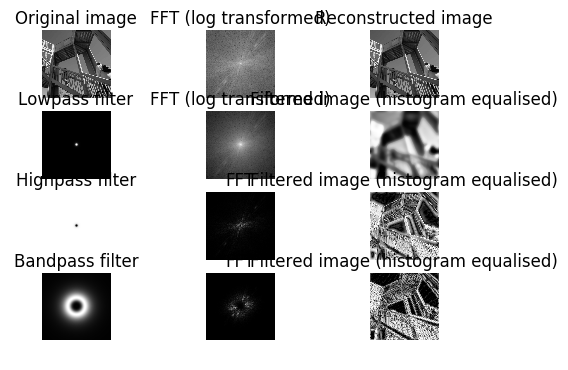

In [4]:
test()

In [4]:
#masktest
import numpy as np
mask1=np.asarray([True,False,False])
mask2=np.asarray([True,False,True])
print mask1 & mask2

[ True False False]
